# **Artificial Intelligence**

# **School of Mechanical Engineering- Tehran University**
# **Assignment 3- [Due Date: June 19, 2022]**

#**Part I : [Quantum Machine Learning with TensorFlow Quantum]**
#**Part II: [Convolutional Neural Networks with PyTorch]**
#**Part III:[Neural_Networks with PyTorch]**



# **Dear students**

# **G day**

# **This is your third assignment. You must explain all the codes for Part I (Quantum Machine Learning with TensorFlow Quantum), Part II (Convolutional Neural Networks with PyTorch) and Part III( Neural_Networks with PyTorch). Since you are familiar with TensorFlow, I expect you to study PyTorch. In the text cell where it says, [Explanation for the cell below is required], you should delete this text and insert a clear explanation for the codes. Then, you should record your presentation (Approximately 30 mins for all Parts[ Part I, Part II, and Part III ].You should submit one video presentation and your notebook on June 19, 2022.**

# **Cheers,**

# **Affiliated Research Professor Mohammad Khoshnevisan**





#  **Part I : Quantum Machine Learning with TensorFlow Quantum (TFQ)**

In [ ]:
!pip install tensorflow-gpu==2.1.0
!pip install cirq==0.7.0 pathos==0.2.5 tensorflow-quantum==0.2.0

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split 


import tensorflow_quantum as tfq
import cirq
import sympy

from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [3]:

print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.2.0
We are using the Cirq version 0.7.0


#**1. Load and Split Dataset**
Fashion-MNIST is a dataset consists of 10 different types of clothes images. there is a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [4]:
from tensorflow.keras.datasets import fashion_mnist as dataset

In [5]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


# **2. Filter data**
In this notebook we want to calssify between 2 classes of Ankle Boots and Sandals, so this is binary classification problem and we set the ankle boots to false and sandals to true.

we define a function called ***filter_data*** that get 2 parameters 1st one is array consists of images and the 2nd one is vector of labels. ankel boots and sandals are label 5 and 9 respectively, so for seperating these two classes, we store ***True*** in list ***keep*** if corresponding label value is eqaul to 9 or 5 and store ***False*** otherwise.

after storing indices in the ***keep***, we set the new x and y to vlues of those specific indices and after that we change the lables from 5 and 9 to ***True*** and ***False*** respectively.

In [7]:
def filter_data(x, y):
  
  
  keep = (y == 5) | (y == 9)
  x, y = x[keep], y[keep]
  
  y = y == 5
  return x,y

# **3. Filtering**
Filter our training and test data and convert to binary dataset.

In [8]:

X_train, y_train = filter_data(X_train, y_train)


X_test, y_test = filter_data(X_test, y_test)

# **4. Dataset size**
48 thousand examples elleminated from dataset and we have 12 thousand as training and 2 thousand as test data.

In [9]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (12000, 28, 28)
The shape of the y_train is (12000,)
The shape of the X_test is (2000, 28, 28)
The shape of the y_test is (2000,)


# **5. Investigation**
Let's check some images in dataset. show image by ***plt.imshow*** picture and the label of this corresponding image has shown in the top of the image.

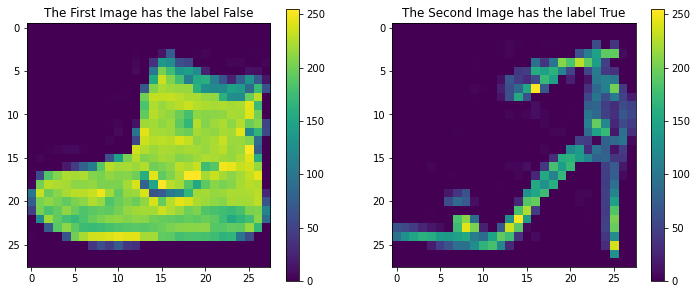

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0])
plt.title("The First Image has the label {}".format(y_train[0]))
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(X_train[1])
plt.title("The Second Image has the label {}".format(y_train[1]))
plt.colorbar()
plt.show()

# **6. Normalization**
Nomalize data to converge more smooth.

In [11]:
X_train = X_train/255.0
X_test = X_test/ 255.0

# **7. Visualization**
As it is clear the values of the pixels has scaled to between 0 and 1 according to colorbar in the right side of the image.

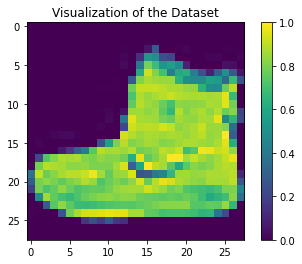

In [12]:
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

# **8. Resize**
Resize images from 2d array of 28 by 28 to 3d array of 28 by 28 by 1 to be compatible with model input size as model only accept 4d input shape **(batch_size=number of examples, height, width, channel)**.

In [13]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

#**9. Reshape**
Reshape images to 2 by 2 matrices of qubits.

In [14]:
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()


# **10. Visualization**
As it is clear, the 1st image of training set, there is nearly nothing in the left upper cell of image, almost half of the 2nd cell and the most part of two down cells has occupied by the boot.

(2, 2)


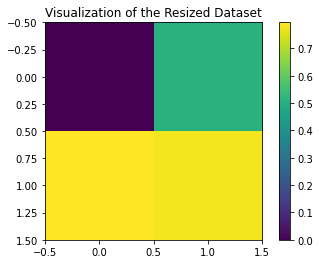

In [15]:
plt.imshow(X_train[0,:,:,0])
print(X_train[0,:,:,0].shape)
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

# **11. Split**
Seperate 15% of data and store as validation dataset.

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)

In [17]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (10200, 2, 2, 1)
The shape of the y_train is (10200,)
The shape of the X_valid is (1800, 2, 2, 1)
The shape of the y_valid is (1800,)


# **12. Vectorization**
Convert 2 by 2 matrice to vector of size 4. 

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

# **13. Attention**
Values of first image in vector of size 4 shows that most of the down part of image has occupied by boot because last two parts of vector have value more than 0.5.

In [19]:
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


# **14. Binary Encode**
It's a function that takes vector and convert elements to binary format while if an element value is more than 0.5, converted to 1 and otherwise converted to 0. Finally function return list of 0 and 1.

In [20]:

def binary_encode(X,threshold=0.5):
  
  encoded_images = list()
  for image in X:
    
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

# **15. Encode Training Set**
Encode vector of images in training dataset to binary format.

In [21]:
X_train = binary_encode(X_train)

# **16. Example**
For the sake of example, binary format of 1st vector in training set that already shown above is **[0, 0, 1, 1]**

In [22]:
print(X_train[0])

[0 0 1 1]


# **17. Training Set Shape**
The shape of training set is number of examples by 4 because each vector of image has already converted to a 4 element list.

In [23]:
print("The shape of the X_train is {}".format(X_train.shape))

The shape of the X_train is (10200, 4)


# **18. Create Circuit**
It's a function that takes ***encoded_image*** as list of length 4 and creates a circuit and a 2 by 2 mtrice of qubits\begin{matrix} (0, 0) & (0, 1)\\ (1,0) & (1, 1)\end{matrix}  and wherever the pixel value of each image cell would be equal to 1, append ***X*** quantum gate (***X*** in quantum gates behaves like ***NOT*** in logic gate) to the circuit and return circuit at the end. 

In [24]:
def create_circuit_from_image(encoded_image):
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

# **19. Apply Create Circuit Function to Training Set**
Convert encoded images in training dataset to circuits.

In [25]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

# **20. Example**
for the sake of example, 1st training example circuit has **X** gate at (1, 0) and (1, 1) because 3rd and 4th element of encoded image list are equal to 1. 


In [26]:
print(X_train[0])

(1, 0): ───X───

(1, 1): ───X───


# **21. Converting to Tensors**
Convert circuits of training set to tensors.

In [27]:
X_train_tfq = tfq.convert_to_tensor(X_train)

# **22. Validation and Test**
Apply all of the following cnversion processes to validation and test set.

In [28]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [29]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [30]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

# **23. Class QNN**
QNN class takes ***data_qubits*** and ***readout*** as input and cobsist of 3 functions as described below:

***add_singleQubit_gate***: takes ***circuit***, ***gate*** and ***qubit_index*** as input and add the detemined gate of vlues in the ***qubit_index*** of ***data_qubit***.

***add_twoQubit_get***: it's very simillar to previous function and only difference is adding 2 gate simultaneously.

***add_layer***: takes ***circuit***, ***gate*** and ***symbol_gate*** as input and add gates of data qubits to circuit with name of symbol gate and store the output to readout.

In [31]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)

# **24. Create QNN**

Before diving into details let's talk about qubits and gates:

Qubits

\begin{equation} <0| = \begin{matrix} 1 \\ 0\end{matrix} , <1| = \begin{matrix} 0 \\ 1\end{matrix}\end{equation}
<p align='center'><img src='https://qiskit.org/textbook/images/ch-states/single-qubit-gates_7_0.
png'> </p>
\begin{equation} \psi = \cos{\frac{\theta}{2}}<0| +e^{i\times{phi}}\times \sin{\frac{\theta}{2}}<1| \end{equation}

##Gates
**X gate**: **X** gate in quantum works like **NOT** gate in logic gate means that convert |0> (0 in quantum) to |1> (1 in quantum) and |1> to |0>.
\begin{equation} X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\end{equation}
**XX gate**: **XX** gate is a 4 by 4 Ising coupling gates
\begin{equation}XX = \begin{bmatrix} \cos{\phi} & 0 & 0 & -i\sin{\phi} \\ 0 & \cos{\phi} & -i\sin{\phi} & 0 \\ 0 & i\sin{\phi} & \cos{\phi} & 0 \\ -i\sin{\phi} & 0 & 0 & \cos{\phi} \end{bmatrix} \end{equation}

**Z gate**: **Z** gate in quantum works as phase flip 
\begin{equation} Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\end{equation}
**ZZ gate**: **ZZ** gate is another Ising coupling gate
\begin{equation}ZZ = \begin{bmatrix} e^{-i\frac{phi}{2}} & 0 & 0 & 0 \\ 0 & e^{-i\frac{phi}{2}} & 0 & 0 \\ 0 & 0 & e^{-i\frac{phi}{2}} & 0 \\ 0 & 0 & 0 & e^{-i\frac{\phi}{2}} \end{bmatrix} \end{equation}

**H gate**: **H** gate is Hadmard gate:
\begin{equation}H=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\end{equation}

It's a function that creates 2 by 2 matrix of qubits called ***data_qubits*** and a variable called ***readout*** for storing output, and a circuit for oeprating gates.

after creating circuit, add **X** and **H** gate to ***readout*** then call QNN class with ***data_qubits*** and ***readout*** as instances after that add **XX** gate and **ZZ** gate to ***circuit*** and for the final gate add another **H** gate to the circuit.

In [32]:
def create_qnn():
    
    data_qubits = cirq.GridQubit.rect(2,2)  
    readout = cirq.GridQubit(-1, -1)         
    circuit = cirq.Circuit()

    
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)
    
    

    
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

# **25. Model**
Call ***create_qnn*** function and save model and circuit.

In [33]:
qmodel, model_readout = create_qnn()

# **26. Circuit**
Let's look at circuit diagram.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


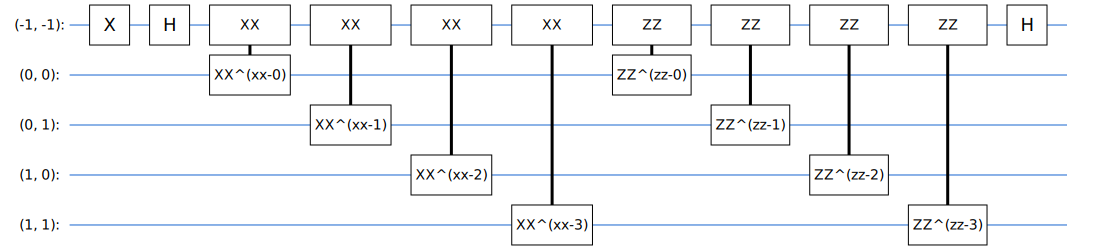

In [34]:
SVGCircuit(qmodel)

# **27. Implement Model**
Create temsorflow quantum model by defining inputs and layers

In [35]:
model = tf.keras.Sequential([
                             
   
    tf.keras.layers.Input(shape=(), dtype=tf.string),

            
    tfq.layers.PQC(qmodel, model_readout),
])

#**28. Coversion**
To use Hinge Loss, we convert the labels to 1 and -1.

In [36]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

# **29. Example**
Let's have a look at the first label from the training dataset

In [37]:
print(y_train_h[0])

1


# **30. Hinge Accuracy**
Define a custom hinge accuracy function where it counts number of times that prediction is equal to true label.

In [38]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

# **31. Compile**
Compile model with Adam optimizer and Hinge loss function and custom hinge accuracy that defined above.

In [39]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

# **32. Train**
Train 10 epochs and with 64 as batch size.

In [40]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Train on 10200 samples, validate on 1800 samples
Epoch 1/10
10200/10200 [==============================] - 13s 1ms/sample - loss: 0.7626 - hinge_accuracy: 0.7422 - val_loss: 0.5921 - val_hinge_accuracy: 0.8292
Epoch 2/10
10200/10200 [==============================] - 12s 1ms/sample - loss: 0.4899 - hinge_accuracy: 0.8198 - val_loss: 0.4140 - val_hinge_accuracy: 0.8351
Epoch 3/10
10200/10200 [==============================] - 12s 1ms/sample - loss: 0.4073 - hinge_accuracy: 0.8345 - val_loss: 0.3929 - val_hinge_accuracy: 0.8351
Epoch 4/10
10200/10200 [==============================] - 12s 1ms/sample - loss: 0.3952 - hinge_accuracy: 0.8198 - val_loss: 0.3932 - val_hinge_accuracy: 0.7958
Epoch 5/10
10200/10200 [==============================] - 12s 1ms/sample - loss: 0.3933 - hinge_accuracy: 0.8023 - val_loss: 0.3956 - val_hinge_accuracy: 0.7958
Epoch 6/10
10200/10200 [==============================] - 12s 1ms/sample - loss: 0.3931 - hinge_accuracy: 0.8023 - val_loss: 0.3961 - val_hinge_ac

# **33. Evaluation**
Evalute the model performance with test set to 

In [41]:
model.evaluate(X_test_tfq, y_test_h)

2000/2000 [==============================] - 1s 258us/sample - loss: 0.3703 - hinge_accuracy: 0.8229


[0.3702802050113678, 0.8229167]

# **34. Visualization**
As it is clear the model accuracy is not improved after 2nd epoch

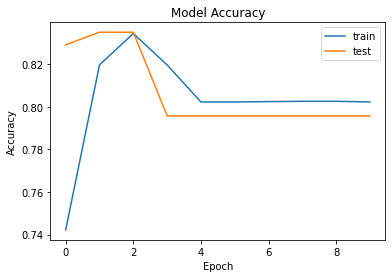

In [42]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

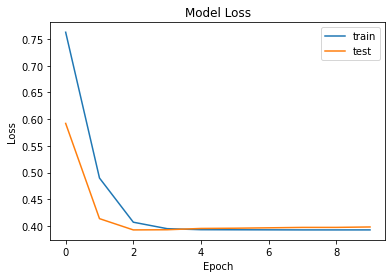

In [43]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

# **Part II : Convolutional Neural Networks with PyTorch**

In [44]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# **0. Load Data**
Download and load MNIST dataset into training and validation subset.

In [47]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **1. Image Converter**
This function takes ***tensor*** as input, convert to image, flips the image channel back to RGB, multiply 0.5 in each pixel value and sum of 0.5 because pixel values are in range(-1,1) and must be scaled between (0,1), and finally clip pixel values between (0,1) to avoid mistakes.

In [48]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

# **2. Visualization**
Get one batch from dataset to show some pictures of training datset.

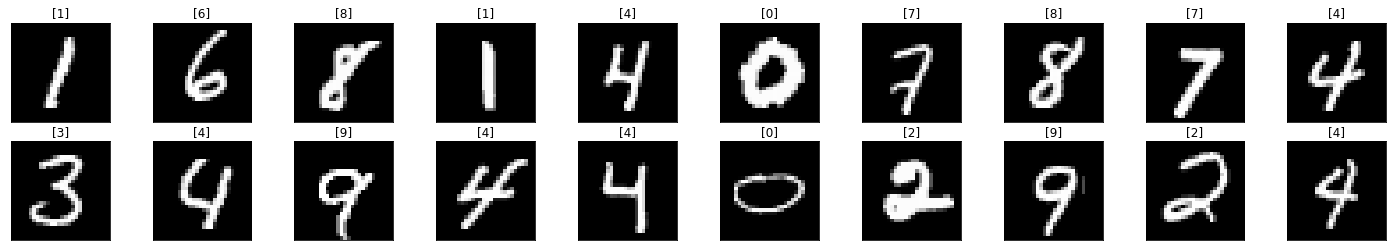

In [49]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

# **3. LeNet Class**
The following steps need to be done to implement model:

1. ***nn.Module*** must be passed as a parent class (as the pytorch documentation mentioned)

2. ***super().__init__()*** makes the ***__init__*** method of ***nn.module*** class run once.

3. define layers as class instances.

4. define forward method.

5. 1st layer is convolutional layer that has 20 different 5 by 5 filter with stride equal to 1 and ReLU as activiation function.

6. 2nd layer is a max pooling layer with 2 by 2 kernel size and stride equal to 2.

7. 3rd layer is convolutional layer that has 50 different 5 by 5 filter with stride equal to 1 and ReLU as activiation function.

8. 4th layer is also maxpooling layer like 2nd layer.

9. 5th layer is flatten layer.

10. 6th layer is fully connected layer with 500 nodes that has 0.5 chance of dropout and ReLU as activation function.

11. 7th layer is fully connected layer with 10 nodes.

In [50]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 20, 5, 1)
      self.conv2 = nn.Conv2d(20, 50, 5, 1)
      self.fc1 = nn.Linear(4*4*50, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*50)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

#**4. Load Model**
Load model on GPU by convert to CUDA optimized model if CUDA is available.

In [51]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

# **5. Compile Model**
Use cross entropy as loss function because it's multi class classification and set the optimizer to adam with learning rate equal to 0.0001.

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

# **6. Train!**
Let's begin training up to 4 epochs and take validation and training loss and accuracy as metrics.

In [53]:
epochs = 4
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.6118, acc 83.1033 
validation loss: 0.2009, validation acc 94.1200 
epoch : 2
training loss: 0.1592, acc 95.2983 
validation loss: 0.1114, validation acc 96.7400 
epoch : 3
training loss: 0.1044, acc 96.8050 
validation loss: 0.0789, validation acc 97.6300 
epoch : 4
training loss: 0.0824, acc 97.5783 
validation loss: 0.0671, validation acc 97.8600 


# **7. Visualization**
Plot training loss and validation loss to watch for possible problems like overfitting.

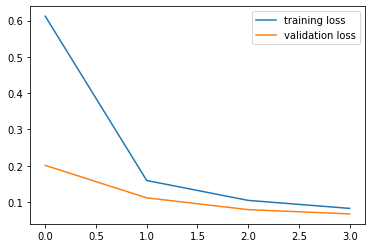

In [54]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

# **8. Visualization**
Plot training and avlidation accuracy to watch for possible problem like overfitting.

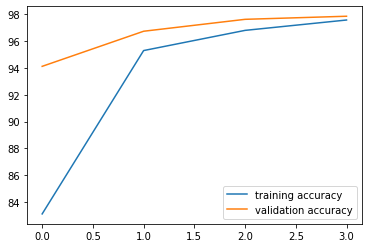

In [55]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

#**Part III: Neural_Networks with PyTorch**

In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

# **1. Create Data**
Create data by 2 batches of random points (totally 500) that makes a nearly 2 cocenteric circles.

In [57]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

# **2. Visualization**
Plotting data: there is two types of data where the points that makes the smaller circle label equal to 1 and bigger circle labels equal to 0.

In [58]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

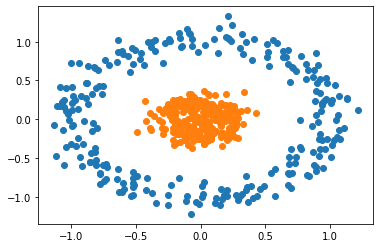

In [59]:
scatter_plot()

# **3. Class Model**
The following steps need to be done to implement model:

1. ***nn.Module*** must be passed as a parent class (as the pytorch documentation mentioned)

2. ***super().__init__()*** makes the ***__init__*** method of ***nn.module*** class run once.

3. define layers as class instances.

4. define forward method.

5. 1st layer is fully connected layer by connecting ***input_size*** number of nodes to ***H1*** number of nodes with sigmoid as activation function.

6. 2nd layer is fully connected layer by connecting ***H1*** number of nodes to ***output_size*** number of nodes with sigmoid as activation function.

7. set the label 1 whichever the prediction is more than 0.5 and 0 otherwise.

In [60]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0

# **4. Load Model**
Set the generating seed equal to 2 and load model with instances 2, 4 and 1 as ***input_size***, ***H1*** and ***output_size*** respectively.

In [61]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


# **5. Compile Model**
Use binary cross entropy as loss function because of binary classification problem and set optimizer to Adam with learning rate equal to 0.01.

In [62]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# **6. Train!**
Let's begin training up to 100 epochs and take training loss as metric.

In [63]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148520350456238
epoch: 1 loss 0.7117707133293152
epoch: 2 loss 0.7089375257492065
epoch: 3 loss 0.7063546180725098
epoch: 4 loss 0.7040227055549622
epoch: 5 loss 0.7019400596618652
epoch: 6 loss 0.7001037001609802
epoch: 7 loss 0.6985084414482117
epoch: 8 loss 0.6971474885940552
epoch: 9 loss 0.6960120797157288
epoch: 10 loss 0.6950911283493042
epoch: 11 loss 0.6943708658218384
epoch: 12 loss 0.6938351988792419
epoch: 13 loss 0.6934651136398315
epoch: 14 loss 0.6932395100593567
epoch: 15 loss 0.6931353807449341
epoch: 16 loss 0.6931286454200745
epoch: 17 loss 0.6931947469711304
epoch: 18 loss 0.6933096647262573
epoch: 19 loss 0.6934511661529541
epoch: 20 loss 0.6935994625091553
epoch: 21 loss 0.6937383413314819
epoch: 22 loss 0.6938555240631104
epoch: 23 loss 0.6939425468444824
epoch: 24 loss 0.6939951181411743
epoch: 25 loss 0.6940121650695801
epoch: 26 loss 0.6939955949783325
epoch: 27 loss 0.6939494013786316
epoch: 28 loss 0.6938791275024414
epoch: 29 loss 0.6937912

# **7. Visualization**
Plot training loss to watch the model performance.

Text(0.5, 0, 'epoch')

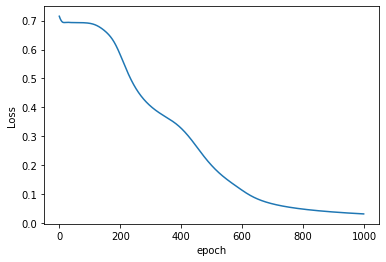

In [64]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

# **8. Visualization**
Draw contour of prediction to see decission boundary.

In [65]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

# **9. Visualization**
Decission boundary has shape of triangle!

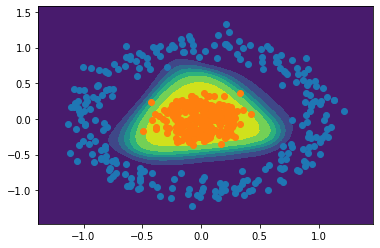

In [66]:
plot_decision_boundary(X, y)
scatter_plot()

# **10. Test**
Test the (0.025,0.025) as a test example to see how model predicts.

Prediction is 1


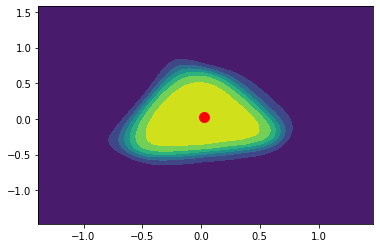

In [67]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)